# LDA

### Referencias

- [Twitter Topic Modeling](https://towardsdatascience.com/twitter-topic-modeling-e0e3315b12e2)
- [Topic Modeling with Gensim (Python)](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#18dominanttopicineachsentence)
- [Reddit Machine Learning for Topic Analysis](https://machinelearninghd.com/reddit-machine-learning-sentiment-and-topic-analysis/)

In [1]:
import gensim.corpora as corpora
import nltk, spacy, gensim
import pickle
import pandas as pd
import pyLDAvis.gensim_models
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
TEXT_FILE_READ = 'docs/preprocessing_reddit_data.csv'
TEXT_SAVE_FILE = 'docs/reddit_data_lda.csv'
FILENAME_PICKLE = "docs/tmpreddit.pickle"

In [3]:
with open(FILENAME_PICKLE, 'rb') as f:
    df = pickle.load(f)

In [4]:
# Create Dictionary
id2word = corpora.Dictionary(df['lemma_tokens'])

# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)

# Creating a corpus object
corpus = [id2word.doc2bow(d) for d in df['lemma_tokens']]


In [5]:
# Instantiating a Base LDA model
base_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                  id2word=id2word,
                                                  num_topics=27,
                                                  random_state=100,
                                                  chunksize=10000,
                                                  passes=10,
                                                  alpha='auto',
                                                  per_word_topics=True)

In [6]:
for index, topic in base_model.show_topics(num_topics=30, formatted=False, num_words= 30):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))

Topic: 0 
Words: ['gracias', 'pobre', 'él', 'dios', 'ir', 'buscar', 'aire', 'mate', 'imaginar', 'hacer', 'mina', 'flaco', 'familia', 'bola', 'verano', 'paja', 'querer', 'dejar', 'quedar', 'yo', 'padre', 'edit', 'pasar', 'consejo', 'viaje', 'jajajajaja', 'estilo', 'interesar', 'km', 'pan']
Topic: 1 
Words: ['q', 'robar', 'él', 'nivel', 'nacional', 'billete', 'miedo', 'osea', 'regalar', 'pasar', 'pegar', 'gente', 'increíble', 'social', 'aceptar', 'quejar', 'trabajar', 'frio', 'culpa', 'imprimir', 'red', 'argentino', 'acabar', 'pie', 'jajajaj', 'millón', 'peluca', 'afip', 'duro', 'cargo']
Topic: 2 
Words: ['seguro', 'alberto', 'auto', 'perro', 'ver', 'él', 'sueldo', 'mandar', 'llorar', 'puesto', 'razón', 'caminar', 'quilombo', 'salir', 'obra', 'moto', 'seguramente', 'poner', 'arte', 'tele', 'perón', 'dejar', 'banda', 'actual', 'mierda', 'tener', 'olor', 'rato', 'gana', 'vereda']
Topic: 3 
Words: ['gustar', 'andar', 'che', 'entrar', 'encontrar', 'debate', 'casa', 'imagen', 'comida', 'tema'

In [7]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(base_model, corpus, id2word)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
26     0.095548  0.041075       1        1  4.483117
0      0.071202 -0.067201       2        1  4.399720
3     -0.004555  0.057910       3        1  4.119714
6      0.103301 -0.030604       4        1  4.104897
24     0.078439 -0.049074       5        1  4.063763
12    -0.012890  0.132275       6        1  3.975275
9     -0.024644  0.058441       7        1  3.942779
19     0.014362 -0.055894       8        1  3.936282
10    -0.008337  0.144739       9        1  3.912716
5      0.078154 -0.066952      10        1  3.883637
1      0.001912 -0.018929      11        1  3.831578
21    -0.008005  0.069432      12        1  3.806629
22     0.004571 -0.010571      13        1  3.730713
13     0.038719 -0.150057      14        1  3.688929
11    -0.029231  0.132670      15        1  3.663218
2      0.018297 -0.049452      16        1  3.611884
14    -0.050242  0.097384      17        1  3.593611
18     0.072687 -0.037079      18        1  3.569806
7     -0.023004  0.133145      19        1  3.518845
8      0.027759 -0.042163      20        1  3.497981
16     0.090181 -0.047720      21        1  3.469464
4      0.027544  0.094575      22        1  3.427528
20    -0.002127  0.003967      23        1  3.391642
17     0.034275 -0.107130      24        1  3.226321
15    -0.317560 -0.066365      25        1  3.192824
23    -0.016126 -0.071396      26        1  2.989040
25    -0.260232 -0.095027      27        1  2.968089, topic_info=          Term        Freq       Total Category  logprob  loglift
105     gustar  416.000000  416.000000  Default  30.0000  30.0000
701      viejo  394.000000  394.000000  Default  29.0000  29.0000
389   gobierno  354.000000  354.000000  Default  28.0000  28.0000
100   entender  393.000000  393.000000  Default  27.0000  27.0000
601      votar  314.000000  314.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
70      chorro   42.144350   61.882279  Topic27  -4.7778   3.1331
1197    vestir   44.988335   70.262787  Topic27  -4.7125   3.0714
338      abajo   46.007309   83.073386  Topic27  -4.6901   2.9263
855     mierda   38.667270  378.486945  Topic27  -4.8639   1.2361
765         re   34.040068  322.954773  Topic27  -4.9914   1.2673

[1466 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1178      9  0.980839      +
137       4  0.035452     /s
137      10  0.948353     /s
137      26  0.008863     /s
4736     15  0.934838     /u
...     ...       ...    ...
46       13  0.114534  único
46       15  0.067679  único
46       20  0.036443  único
7061     16  0.968406      ⠀
5656      3  0.970846      🏿

[3533 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[27, 1, 4, 7, 25, 13, 10, 20, 11, 6, 2, 22, 23, 14, 12, 3, 15, 19, 8, 9, 17, 5, 21, 18, 16, 24, 26])

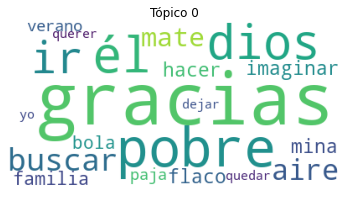

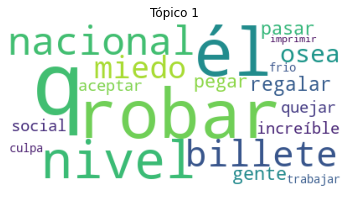

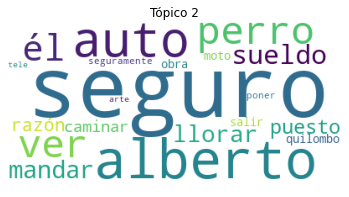

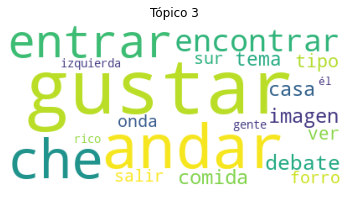

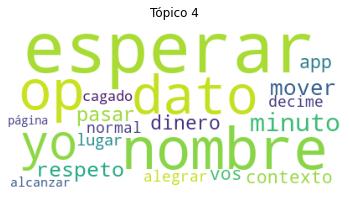

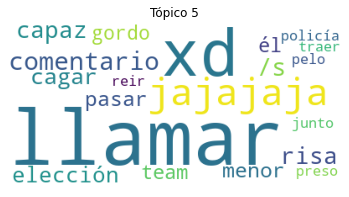

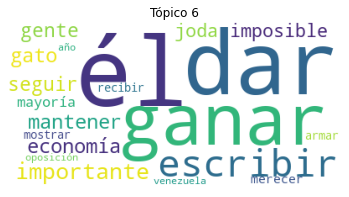

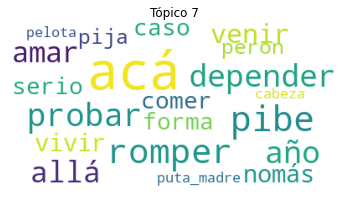

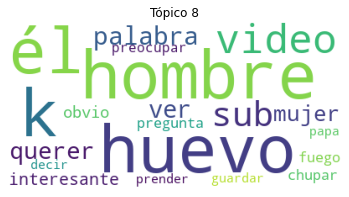

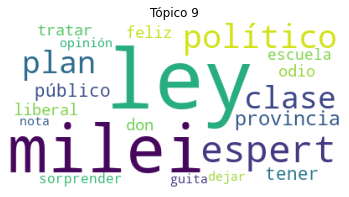

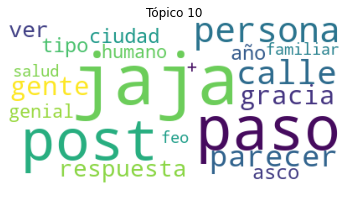

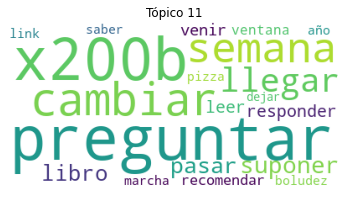

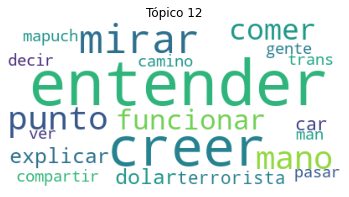

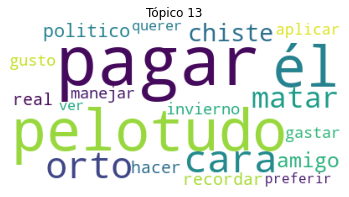

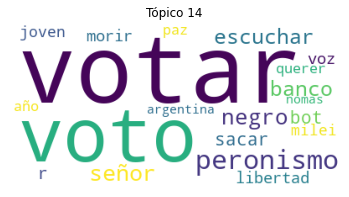

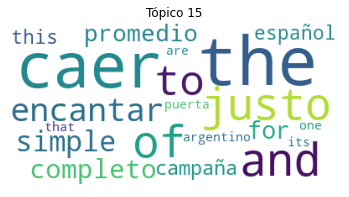

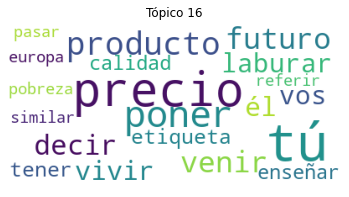

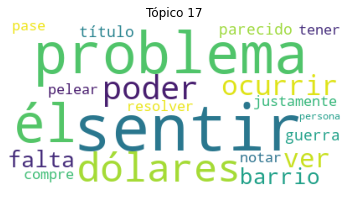

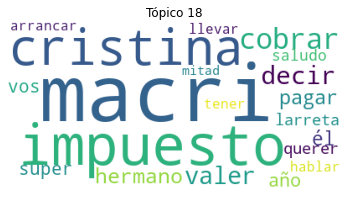

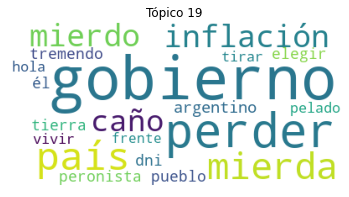

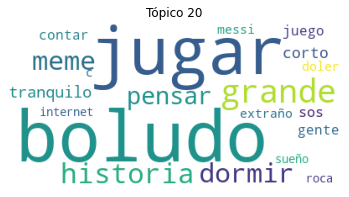

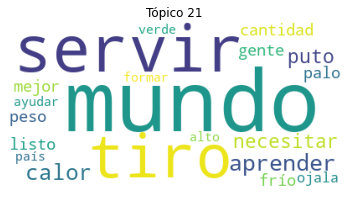

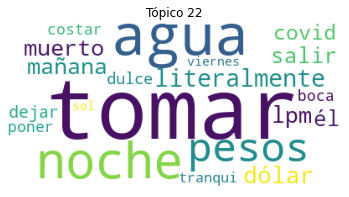

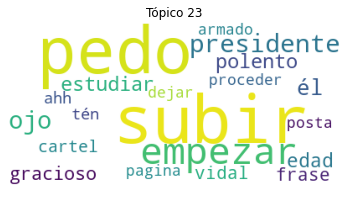

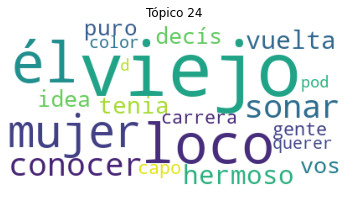

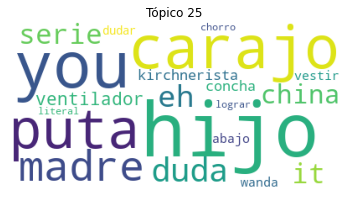

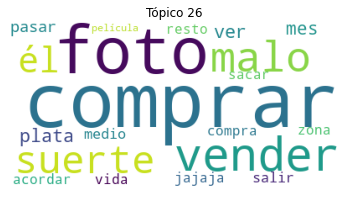

In [8]:
for index, topic in base_model.show_topics(num_topics=30, formatted=False, num_words= 30):
    plt.figure()
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1.0)
               .fit_words(dict(base_model.show_topic(index, 20))))
    plt.axis("off")
    plt.title("Tópico " + str(index))
    plt.show()

In [9]:

def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # row = sorted(row, key=lambda x: (x[1]), reverse=True) # old line
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0: # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
                #ent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4)]), ignore_index=True)
                #print(sent_topics_df)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    #sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution']

    # Add original text to the end of the output
    #contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, texts], axis=1)
    return(sent_topics_df)


In [ ]:
reddit = pd.read_csv(TEXT_FILE_READ)
df_topic_sents_keywords = format_topics_sentences(ldamodel=base_model, corpus=corpus, texts=reddit)

In [10]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
#df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,index,Dominant_Topic,Perc_Contribution,Topic_Keywords,score,id,flair,comms_num,body,comment_parent_id,...,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,lemma_tokens,body_preprocessing,body_no_lemmas
0,0,22.0,0.4644,"tomar, agua, noche, pesos, literalmente, dólar...",1,hfw14mt,Discusion🧐,1,todo para decir que tapaste el baño. tira un b...,q44kw3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['tapastar', 'baño', 'tirar', 'balde', 'agua']",tapastar baño tirar balde agua,tapaste baño. tira balde agua pa
1,1,4.0,0.4878,"esperar, nombre, op, dato, yo, minuto, mover, ...",1,hfw41eh,Discusion🧐,0,"sopapa primero master, si hay tapón te vas a t...",hfw14mt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sopapa', 'master', 'tapón', 'teñir', 'medias']",sopapa master tapón teñir medias,"sopapa master, tapón vas a teñir medias!"
2,2,22.0,0.4881,"tomar, agua, noche, pesos, literalmente, dólar...",1,hfw1ao2,Discusion🧐,0,"Usas la sopapa, o tiras agua caliente con un b...",q44kw3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sopapa', 'tira', 'agua', 'caliente', 'balde']",sopapa tira agua caliente balde,"sopapa, o tiras agua caliente balde"
3,3,22.0,0.5851,"tomar, agua, noche, pesos, literalmente, dólar...",1,hfw3jof,Discusion🧐,2,Lo que he probado que siempre me dio resultado...,q44kw3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['probado', 'resultado', 'sellar', 'boca', 'in...",probado resultado sellar boca inodoro tirar ca...,probado resultado sellar boca inodoro y tirar ...
4,4,5.0,0.3870,"llamar, xd, jajajaja, comentario, /s, risa, ca...",1,hfw6v4i,Discusion🧐,0,Estas cobrando por dar mantenimiento y no sabe...,q44kw3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['cobrar', 'mantenimiento', 'carajo', 'kjjjjjj...",cobrar mantenimiento carajo kjjjjjjjjj viviria...,cobrando mantenimiento y carajo? kjjjjjjjjj. v...
5,5,22.0,0.4431,"tomar, agua, noche, pesos, literalmente, dólar...",1,hfw26iv,Discusion🧐,0,"Si tenes algo con punta, metelo y hace un poco...",q44kw3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['tener', 'punta', 'metelo', 'fuerza', 'romper...",tener punta metelo fuerza romper tapa baño tir...,"tenes punta, metelo y fuerza, ""romper"" tapa ba..."
6,6,18.0,0.5658,"macri, impuesto, cristina, cobrar, decir, vale...",1,hfw2gof,Discusion🧐,1,"Con una manguera para regar el jardín, si tene...",q44kw3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['manguerar', 'regar', 'jardín', 'tener', 'pro...",manguerar regar jardín tener probar,"manguera regar jardín, tenes, podes probar."
7,7,7.0,0.2634,"acá, pibe, romper, probar, año, depender, allá...",1,hfw5s13,Discusion🧐,0,"despues regas el jardin y se lava sola, solo q...",hfw2gof,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['rega', 'jardin', 'lavar', 'tenés', 'lavar', ...",rega jardin lavar tenés lavar tú mano pulgar c...,"regas jardin y lava sola, tenés lavarte manos ..."
8,8,19.0,0.5849,"gobierno, perder, país, mierda, inflación, mie...",1,hfw3air,Discusion🧐,0,La respuesta real es que se venden unos caños ...,q44kw3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['respuesta', 'real', 'vender', 'caño', 'alamb...",respuesta real vender caño alambrado decir cañ...,"respuesta real venden caños “alambrados”, diga..."
9,9,1.0,0.2470,"q, robar, él, nivel, nacional, billete, miedo,...",7,hfvxa6w,Discusion🧐,3,Mi alfajor favorito es el Havana,q443eo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['alfajor', 'favorito', 'havana']",alfajor favorito havana,alfajor favorito havana


In [11]:
df_dominant_topic.to_csv(TEXT_SAVE_FILE, index=False)